<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Italy_K_mean_Clustering_Approach1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

In [36]:
df= pd.read_excel("/content/Approach1_Excl_barriers.xlsx")
df.head()

,Study Quarter,Unique Serial Number,Weight Final,NC_TRIAL,FMC SOB - NC Negatively Disposed,FMC SOB - NC Positively Disposed,AU 30 MALE,AU 30 FEMALE,30-44 MALE,30-44 FEMALE,...,FMCD-Appealing Packaging design,FMCD-Enjoy the product satisfaction/sensation,FMCD-Socially acceptable,FMCD-Potentially less risky,FMCD-Premium and Sophisticated,FMCD-Is convenient to use,FMCD-Stylish,FMCD-Enjoy the ritual of using it,FMCD-Others,FMCD-It is made of environment friendly materials
0,Q1 2024,4000009,1.307204,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,Q1 2024,4000013,1.307204,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,Q1 2024,4000020,2.215161,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Q1 2024,4000023,2.708526,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Q1 2024,4000033,1.847973,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df.columns

Index(['Study Quarter', 'Unique Serial Number', 'Weight Final', 'NC_TRIAL',
       'FMC SOB - NC Negatively Disposed', 'FMC SOB - NC Positively Disposed',
       'AU 30 MALE', 'AU 30 FEMALE', '30-44 MALE', '30-44 FEMALE', '45+ MALE',
       '45+ FEMALE', 'Time Smoking - Cigarette_<1 years',
       'Time Smoking - Cigarette_1-2 years',
       'Time Smoking - Cigarette_2-5 years',
       'Time Smoking - Cigarette_> 5 years', 'Income Groups_High',
       'Income Groups_Low', 'Income Groups_Mid', 'MOB-Tar_Full Flavour',
       'MOB-Tar_Total Lights', 'MOB-Price_Aspirational Premium Segment',
       'MOB-Price_Low Segment', 'MOB-Price_Premium Segment',
       'MOB-Price_VFM Segment', 'ADC_High', 'ADC_Medium', 'ADC_Low',
       'FMCD-Can use in presence of others', 'FMCD-Can use anywhere',
       'FMCD-More hygienic & clean', 'FMCD-Like the taste',
       'FMCD-Variety of flavours & experience', 'FMCD-Better value for money',
       'FMCD-Popular among friends, colleagues & peers',
       'F

In [38]:
#df1=pd.get_dummies(df, columns=['Global Segment','Age','Sex', 'Income Groups','Category Frequency - Cigarette','Consideration HP','Consideration E-Cigarettes','Time Smoking - Cigarette','MOB-Tar','MOB-Price'])

In [21]:

# # Columns to one-hot encode
# columns_to_encode = ['Age','Panel 2','Income Groups', 'Sex','Segment', 'Time Smoking - Cigarette','MOB-Tar','MOB-Price']

# # Perform one-hot encoding
# df1 = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)


In [22]:
# df1.head()

In [23]:
# df1.to_excel("df2.xlsx", index=False)


In [39]:
columns_to_drop = ['Study Quarter', 'Unique Serial Number', 'Weight Final','NC_TRIAL','FMC SOB - NC Negatively Disposed','FMC SOB - NC Positively Disposed']
df1 = df.drop(columns=columns_to_drop)
df1.head()


,AU 30 MALE,AU 30 FEMALE,30-44 MALE,30-44 FEMALE,45+ MALE,45+ FEMALE,Time Smoking - Cigarette_<1 years,Time Smoking - Cigarette_1-2 years,Time Smoking - Cigarette_2-5 years,Time Smoking - Cigarette_> 5 years,...,FMCD-Appealing Packaging design,FMCD-Enjoy the product satisfaction/sensation,FMCD-Socially acceptable,FMCD-Potentially less risky,FMCD-Premium and Sophisticated,FMCD-Is convenient to use,FMCD-Stylish,FMCD-Enjoy the ritual of using it,FMCD-Others,FMCD-It is made of environment friendly materials
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# string_columns = ['Study Quarter']

# encoder = OneHotEncoder(sparse_output=False)
# encoded_cols = encoder.fit_transform(df1[string_columns])

# # Create a DataFrame from the encoded columns
# encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(string_columns))

# # Drop the original string columns and concatenate the encoded columns
# df_encoded = df1.drop(string_columns, axis=1).reset_index(drop=True)
# df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

In [26]:
# df_encoded.head()

In [40]:
X = df1.values

In [41]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

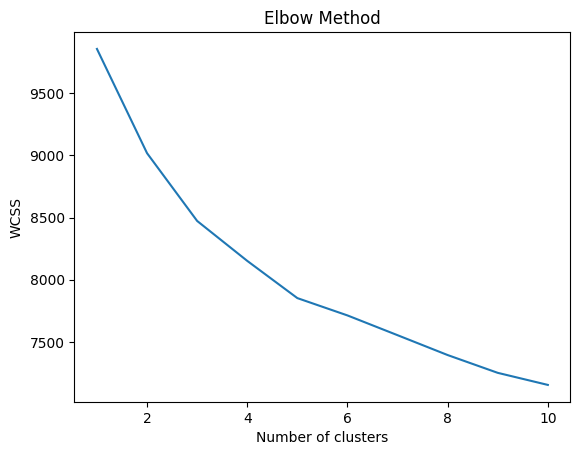

In [42]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

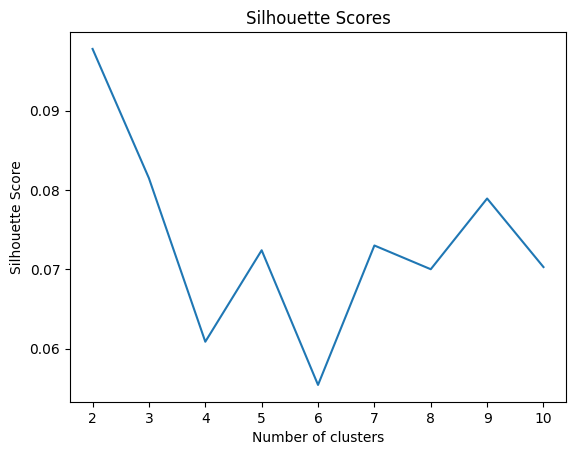

In [43]:
# Silhouette Scores to find the optimal number of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [44]:

optimal_clusters = 3
# Fit the K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=1000, n_init=10, random_state=42)
kmeans.fit(X)



KMeans(max_iter=1000, n_clusters=3, n_init=10, random_state=42)

In [45]:
# Predict the cluster labels
cluster_labels = kmeans.predict(X)
print(cluster_labels)

[1 0 1 ... 2 1 1]


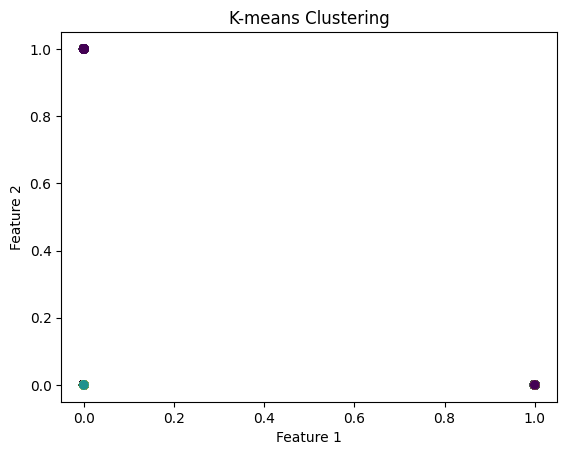

In [46]:
# Plot the clustered data
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

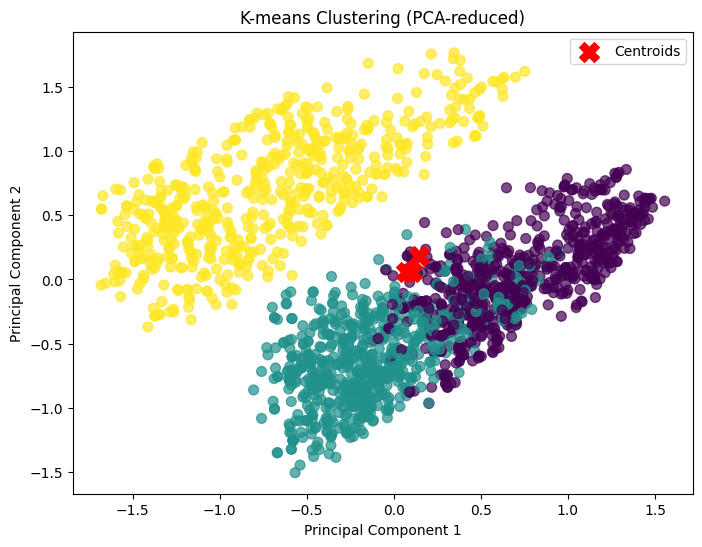

In [47]:



# Step 1: Perform K-means clustering
optimal_k = 3  # Replace with the optimal number of clusters you determined
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(df1)

# Step 2: Reduce data to 2D using PCA
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1)

# Step 3: Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [48]:
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
df1_pca = pca.fit_transform(df1)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
NameError: name 'kmeans_optimal' is not defined

SyntaxError: invalid syntax (<ipython-input-48-5a83e9471f6b>, line 16)

In [16]:
# Perform K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(df1)
# Add cluster labels to DataFrame
df1['Cluster'] = kmeans_optimal.labels_
print(df1.head())

NameError: name 'optimal_k' is not defined

In [120]:
df1.to_excel("df3.xlsx", index=False)

In [117]:
# # Plot the clusters with a legend
# plt.figure(figsize=(8, 6))

# # Create a scatter plot for each cluster
# for cluster_label in np.unique(kmeans_optimal.labels_):
#     plt.scatter(df1_pca[kmeans_optimal.labels_ == cluster_label, 0],
#                 df1_pca[kmeans_optimal.labels_ == cluster_label, 1],
#                 label=f'Cluster {cluster_label}', s=50, alpha=0.7)

# # Plot the centroids
# plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
#             c='red', marker='X', s=200, label='Centroids')

# plt.title('K-means Clustering (PCA-reduced)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [26]:
##scaler = StandardScaler()
#df1_scaled = scaler.fit_transform(X)

In [27]:
# #
# wcss = []  # Within-cluster sum of squares
# silhouette_scores = []
# K = range(2, 11)  # Testing for 2 to 10 clusters

# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(df1_scaled)
#     wcss.append(kmeans.inertia_)

In [28]:
# # Silhouette Score
# silhouette_avg = silhouette_score(df1_scaled, kmeans.labels_)
# silhouette_scores.append(silhouette_avg)

In [29]:
# plt.figure(figsize=(12, 5))
# plt.subplot(1, 2, 1)
# plt.plot(K, wcss, 'bo-')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.title('Elbow Method')

In [30]:
# # Plot the Silhouette Scores
# plt.subplot(1, 2, 2)
# plt.plot(K, silhouette_scores, 'go-')
# plt.xlabel('Number of clusters')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Scores')

# plt.show()
# ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

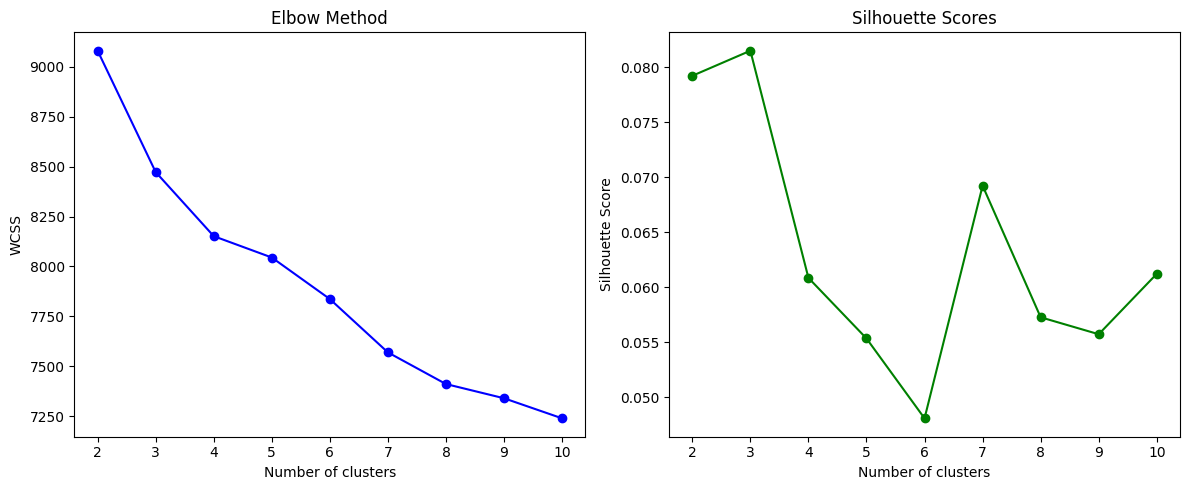

In [52]:
from sklearn.metrics import silhouette_score

# Initialize lists to store WCSS and Silhouette scores
wcss = []
silhouette_scores = []
K = range(2, 11)  # Test for 2 to 10 clusters

# Calculate WCSS and Silhouette scores for each k
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)  # WCSS

    # Silhouette Score (only if k > 1)
    if k > 1:
        silhouette_avg = silhouette_score(df1, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(12, 5))

# Elbow Method Plot
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')

# Silhouette Scores Plot
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()

In [58]:
# Determine the optimal number of clusters
optimal_k = np.argmax(silhouette_scores) + 2  # +2 because we started from k=2
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


In [59]:
# Perform K-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(df1)
# Add cluster labels to DataFrame
df1['Cluster'] = kmeans_optimal.labels_
print(df1.head())

   AU 30 MALE  AU 30 FEMALE  30-44 MALE  30-44 FEMALE  45+ MALE  45+ FEMALE  \
0           0             0           1             0         0           0   
1           0             0           1             0         0           0   
2           0             1           0             0         0           0   
3           1             0           0             0         0           0   
4           1             0           0             0         0           0   

   Time Smoking - Cigarette_<1 years  Time Smoking - Cigarette_1-2 years  \
0                                  0                                   0   
1                                  0                                   0   
2                                  0                                   0   
3                                  0                                   1   
4                                  0                                   0   

   Time Smoking - Cigarette_2-5 years  Time Smoking - Cigarette_> 5 

In [60]:

df1.to_excel("A1EX3.xlsx", index=False)

In [89]:
# # Assuming df1 has 2 features (columns)
# plt.figure(figsize=(8, 6))
# plt.scatter(df1[:, 0], df1[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
# plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
# plt.title('K-means Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.legend()
# plt.show()

InvalidIndexError: (slice(None, None, None), 0)

<Figure size 800x600 with 0 Axes>

ValueError: 'c' argument has 1882 elements, which is inconsistent with 'x' and 'y' with size 1537.

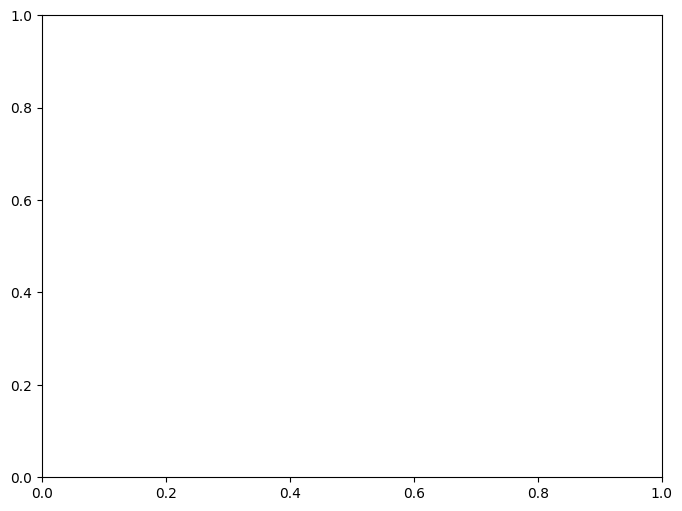

In [84]:
# from sklearn.decomposition import PCA

# # Reduce data to 2D using PCA
# pca = PCA(n_components=2)
# df1_pca = pca.fit_transform(df1_scaled)

# # Plot the clusters
# plt.figure(figsize=(8, 6))
# plt.scatter(df1_pca[:, 0], df1_pca[:, 1], c=kmeans_optimal.labels_, cmap='viridis', s=50, alpha=0.7)
# plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
# plt.title('K-means Clustering (PCA-reduced)')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

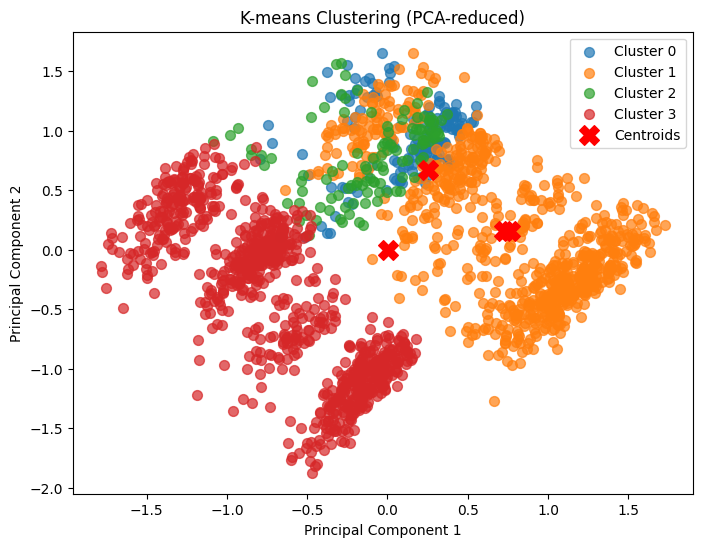

In [175]:
# Plot the clusters with a legend
plt.figure(figsize=(8, 6))

# Create a scatter plot for each cluster
for cluster_label in np.unique(kmeans_optimal.labels_):
    plt.scatter(df1_pca[kmeans_optimal.labels_ == cluster_label, 0],
                df1_pca[kmeans_optimal.labels_ == cluster_label, 1],
                label=f'Cluster {cluster_label}', s=50, alpha=0.7)

# Plot the centroids
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()